#**read the csv file as dataframe**

In [1]:
import pandas as pd

df = pd.read_csv('/Users/wlk/Desktop/3.Semester/CSS/CSIS/nodes')
df=df['specialty;"city";"patients";"free_time";"community";"friends";"adoption_date";"proximity";"med_sch_yr";"jours";"clubs";"meetings";"id";"discuss"'].str.split(';', expand=True)

# df[6] == df[""adoption_date""]
df.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,9,"""Galesburg""","""9""","""9""","""9""","""9""","""99""","""9""","""9""","""9""","""9""","""9""","""246""","""9"""
1,9,"""Galesburg""","""9""","""9""","""9""","""9""","""99""","""9""","""9""","""9""","""9""","""9""","""245""","""9"""
2,9,"""Galesburg""","""9""","""9""","""9""","""9""","""99""","""9""","""9""","""9""","""9""","""9""","""244""","""9"""
3,4,"""Galesburg""","""2""","""1""","""4""","""3""","""98""","""2""","""4""","""4""","""0""","""2""","""243""","""1"""
4,4,"""Galesburg""","""9""","""1""","""5""","""3""","""98""","""2""","""4""","""5""","""0""","""1""","""242""","""2"""
5,1,"""Galesburg""","""9""","""9""","""6""","""9""","""16""","""3""","""2""","""4""","""9""","""1""","""241""","""9"""
6,4,"""Galesburg""","""3""","""1""","""6""","""1""","""98""","""3""","""3""","""9""","""1""","""2""","""240""","""1"""
7,4,"""Galesburg""","""2""","""3""","""6""","""2""","""98""","""3""","""1""","""5""","""0""","""2""","""239""","""2"""
8,4,"""Galesburg""","""3""","""1""","""4""","""3""","""98""","""3""","""2""","""6""","""0""","""2""","""238""","""1"""
9,4,"""Galesburg""","""3""","""1""","""4""","""1""","""98""","""3""","""4""","""4""","""1""","""2""","""237""","""2"""


In [2]:
num_agents = df.shape[0]
print(num_agents)

246


# **rearrange connections into clusters**

In [3]:
import csv

import numpy as np


max_node_array= [116, 166, 210, 246]
cluster_range = [[0,116],[116,166],[166,210],[210,246]]
cluster_size = [116,50,44,36]

cluster_names = ["Peoria","Bloomington" , "Quincy" ,"Galesburg"]



def get_edges_array(cluster_max):

    peoria_cluster_edges = []

    bloomington_cluster_edges = []

    quincy_cluster_edges = []

    galesburg_cluster_edges = []

    with open('/Users/wlk/Desktop/3.Semester/CSS/CSIS/medical_innovationver3.csv',newline='', encoding='utf-8') as f:

        reader = csv.reader(f)

        row_num = 0

        for row in reader:
            if row_num == 0:
                row_num+=1
            else:
                edge_properties = []
                args = row[0].split(";")

                node1 = int(args[0]) -1

                

                node2 = int(args[1][1:-1]) -1

                fr_ad_dis = [int(args[2][1:-1]), int(args[3][1:-1]), int(args[5][1:-1])]

                id = int(args[4][1:-1])

                edge_properties= [node1, node2, fr_ad_dis[0], fr_ad_dis[1], fr_ad_dis[2]]

                if (node1 <= cluster_max[0] and node2 <= cluster_max[0]):

                    

                    peoria_cluster_edges.append(edge_properties)

                elif(node1 <= cluster_max[1] and node2 <= cluster_max[1]): 

                    bloomington_cluster_edges.append(edge_properties)

                elif(node1 <= cluster_max[2] and node2 <= cluster_max[2]): 

                    quincy_cluster_edges.append(edge_properties)

                else: 

                    galesburg_cluster_edges.append(edge_properties)

    return peoria_cluster_edges, bloomington_cluster_edges, quincy_cluster_edges, galesburg_cluster_edges    



###

# edges arrays arguments: 

#   - node1 (from)

#   - node2 (to) 

#   - friendship relation 

#   - advice relation

#   - discussion relation

#  ###

peoria_edges, bloomington_edges, quincy_edges, galesburg_edges = get_edges_array(max_node_array)
edge_properties=[]
edge_properties.append(peoria_edges)
edge_properties.append(bloomington_edges)
edge_properties.append(quincy_edges)
edge_properties.append(galesburg_edges)

# **get time revolution (of opinion status of an agent) with original data**

1.   each row represents an agent
2.   each column represents the agent's opinion at this timepoint



In [4]:
ad_time_all_old = df[6]
ad_time_all=[]
for i in range(246):
  ad_time_all.append(int(ad_time_all_old[i][1:-1]))
print(ad_time_all)
ad_time_all=np.asarray(ad_time_all)

[99, 99, 99, 98, 98, 16, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 7, 98, 14, 4, 7, 14, 6, 3, 6, 13, 8, 3, 4, 8, 5, 4, 18, 18, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 98, 2, 3, 8, 11, 13, 3, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 5, 6, 6, 7, 16, 15, 3, 18, 7, 5, 18, 4, 18, 18, 2, 99, 99, 99, 99, 99, 99, 98, 98, 98, 98, 98, 7, 18, 9, 9, 18, 1, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 7, 17, 5, 11, 2, 2, 1, 1, 5, 2, 1, 6, 7, 18, 1, 6, 7, 98, 1, 98, 99, 99, 99, 99, 99, 99, 99, 99, 99, 18, 98, 98, 7, 98, 98, 98, 98, 98, 98, 3, 4, 13, 5, 2, 1, 6, 7, 98, 99, 98, 98, 99, 98, 98, 98, 18, 4, 18, 6, 1, 7, 6, 1, 12, 12, 18, 98, 11, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 4, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 18, 14, 8, 8, 4, 14, 6, 7, 5, 15, 3, 5, 1, 6, 3, 4, 5, 7, 8, 2, 11, 5, 18, 15, 4, 15, 2, 5, 4, 2, 11, 3, 18, 10, 9, 9, 8, 12, 1]


In [5]:
time_range = ad_time_all.max()
print(time_range)

opinion_timeline_agents = []
for i in range(num_agents):
  opinion_timeline_agent_i = np.zeros(99)
  adoption_timepoint = int(ad_time_all[i])
  opinion_timeline_agent_i=[1 if j >= adoption_timepoint-1 else 0 for j in range(time_range) ] 
  opinion_timeline_agents.append(opinion_timeline_agent_i)
opinion_timeline_agents=np.asarray(opinion_timeline_agents)

print(opinion_timeline_agents)

99
[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


# plot the real percentage change & simulated percentage change with model

cluster  0
    time unit  percentage
0           0    0.017241
1           1    0.051724
2           2    0.094828
3           3    0.129310
4           4    0.163793
5           5    0.198276
6           6    0.250000
7           7    0.275862
8           8    0.293103
9           9    0.293103
10         10    0.310345
11         11    0.310345
12         12    0.327586
13         13    0.344828
14         14    0.353448
15         15    0.370690
16         16    0.379310
17         17    0.448276
18         18    0.448276
19         19    0.448276

cluster  1
    time unit  percentage
0           0        0.10
1           1        0.14
2           2        0.16
3           3        0.20
4           4        0.24
5           5        0.30
6           6        0.38
7           7        0.38
8           8        0.38
9           9        0.38
10         10        0.38
11         11        0.38
12         12        0.40
13         13        0.40
14         14        0.40
15         15  

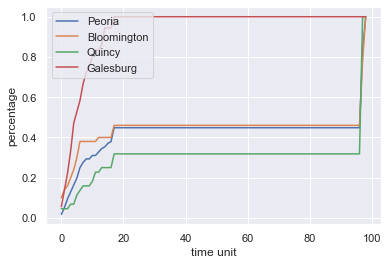

In [6]:
from sklearn.model_selection import train_test_split
import seaborn as sns

# label : percentage of opinion 1 at each timepoint

def get_change_real(cluster_index): 
    
    real_percentage_overtime = []

    for i in range(99):
        cluster_column_i = opinion_timeline_agents[cluster_range[cluster_index][0]:cluster_range[cluster_index][1],i]
        ones = np.count_nonzero(cluster_column_i)
        percent = ones / cluster_size[cluster_index]

        combined = []
        combined.append(i)
        combined.append(percent)

        real_percentage_overtime.append(combined)

    data = pd.DataFrame(real_percentage_overtime, columns = ['time unit','percentage'])  
    
    print("cluster ",cluster_index)
    print(data.head(20))
    print()
    sns.set_theme()    
    sns.lineplot(x='time unit', y='percentage', data=data,label = cluster_names[cluster_index], ci=None)
    
    return real_percentage_overtime

real_cluster_0 = get_change_real(0)
real_cluster_1 = get_change_real(1)
real_cluster_2 = get_change_real(2)
real_cluster_3 = get_change_real(3)

In [7]:
from sklearn.linear_model import LinearRegression
import math
from scipy import stats

# fixed profit
E_profit = 15

# coefficients of relations : k_alpha, k_beta, k_gamma
k_alpha = 1
k_beta = 2
k_gamma = 3


def get_initial_opinions(cluster_number): 
    initial_opinions = []

    for i in range(num_agents): 
        initial_opinions.append(opinion_timeline_agents[i][0])

    peoria_initials = initial_opinions[0:max_node_array[0]]
    bloomington_initials = initial_opinions[cluster_range[1][0]:cluster_range[1][1]]
    quincy_initials = initial_opinions[cluster_range[2][0]:cluster_range[2][1]]
    galesburg_initials = initial_opinions[cluster_range[3][0]:cluster_range[3][1]]
    opinion_initials_per_cluster = [peoria_initials, bloomington_initials, quincy_initials, galesburg_initials]

    return opinion_initials_per_cluster[cluster_number]



# # get percentage of opinion 1 at each timepoint with our model
def get_change_simulated(edge_props, cluster_index):
    simulated_percentage_overtime = []
    
    # initial state
    #initial_state_all = [0,opinion_timeline_agents[:,0]]
    #initial_state_this_cluster = initial_state_all[cluster_range[i][0]:cluster_range[i][1]]
    
    #simulated_percentage_overtime.append(initial_state_this_cluster)
    initial_state_this_cluster = get_initial_opinions(cluster_index)
    current_state = [0, initial_state_this_cluster ]
    simulated_percentage_overtime.append([0, np.count_nonzero(initial_state_this_cluster)/cluster_size[cluster_index]])
    
    # calculate driving force(cluster specific)
    driving_force = update_driving_forces_cluster_specific(edge_props, cluster_index, current_state[1])
    
    # later states
    for i in range(98):
        new_opinions, driving_force = update(driving_force, edge_props, cluster_index, current_state[1])
        current_state = [i+1, new_opinions ]
        simulated_percentage_overtime.append([i+1, np.count_nonzero(new_opinions)/cluster_size[cluster_index]])
        
        
    # plotting
    simulation= pd.DataFrame(simulated_percentage_overtime, columns = ['time unit','percentage'])  
    
    print("cluster ",cluster_index)
    print(simulation.head(20))
    print()
    sns.set_theme()    
    sns.lineplot(x='time unit', y='percentage', data=simulation, label =cluster_names[cluster_index],ci=None)
    

def update_driving_forces_cluster_specific(edge_props, cluster_number, opinions): 
    len_cluster = 0
    first_node = 0
    if cluster_number == 0: 
        len_cluster = max_node_array[0]
    else: 
        len_cluster = max_node_array[cluster_number]-max_node_array[cluster_number-1]
        first_node = max_node_array[cluster_number-1]
    
    updated_driving_force = np.zeros(len_cluster)

    agents_ids = [first_node+i for i in range(len_cluster)]

    for a in agents_ids:
        for edge in edge_props: 
           #check that the edge is directed at node a and opinions of agents don't match
           if edge[1] == a and  not opinions[a-first_node] == opinions[edge[0]-first_node]: 
                updated_driving_force[a-first_node] += edge[2] * k_alpha + edge[3] * k_beta + edge[4]*k_gamma
        updated_driving_force[a-first_node]+=E_profit
        #print("agent {} obtained a driving force of {}".format(a, updated_driving_force[a]))

    return updated_driving_force 


def prob_of_change(driving_forces):
    driving_forces = normalise_driving_force(driving_forces, -2 ,2)
    probs = stats.norm.cdf(driving_forces)
    #probs = np.repeat(0.01, len(driving_forces))
    #probs = driving_forces/(len(driving_forces) * k_alpha + E_profit)
    #print(probs)
    return probs

def normalise_driving_force(driving_forces, a, b):
    min_val = np.amin(driving_forces)
    #max_val = np.amax(driving_forces)
    max_val = ((len(driving_forces) * (k_alpha+k_beta+k_gamma)) + E_profit)
    #return (b-a) * (driving_forces-min_val)/(max_val-min_val) - a
    return ((b-a)* driving_forces/max_val)+a

def opinion(x, p):
    res = (np.random.rand(1))[0]
    return 1-x if res < p else x
    
def opinion_no_return(x, p): 
    if(x == 1):
        return 1
    else: 
        return opinion(x,p) 


def update(driving_forces, edge_props, cluster_index, current_state):
    new_states = []
    prob = prob_of_change(driving_forces)
    for agent in range(cluster_size[cluster_index]):
        #new_state = opinion(current_state[agent], prob[agent])
        new_state_no_return = opinion_no_return(current_state[agent], prob[agent])
        #new_states.append(new_state)
        new_states.append(new_state_no_return)
    
    new_driving_force = update_driving_forces_cluster_specific(edge_props, cluster_index, current_state)
    
    return new_states, new_driving_force


cluster  0
    time unit  percentage
0           0    0.017241
1           1    0.034483
2           2    0.043103
3           3    0.060345
4           4    0.077586
5           5    0.137931
6           6    0.163793
7           7    0.181034
8           8    0.189655
9           9    0.206897
10         10    0.232759
11         11    0.275862
12         12    0.284483
13         13    0.301724
14         14    0.318966
15         15    0.344828
16         16    0.370690
17         17    0.396552
18         18    0.405172
19         19    0.422414

cluster  1
    time unit  percentage
0           0        0.10
1           1        0.14
2           2        0.14
3           3        0.16
4           4        0.16
5           5        0.22
6           6        0.22
7           7        0.28
8           8        0.32
9           9        0.34
10         10        0.34
11         11        0.40
12         12        0.42
13         13        0.48
14         14        0.50
15         15  

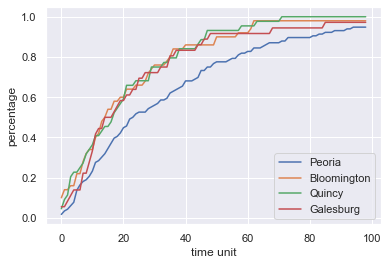

In [8]:
get_change_simulated(peoria_edges, 0)
get_change_simulated(bloomington_edges,1)
get_change_simulated(quincy_edges, 2)
get_change_simulated(galesburg_edges, 3)

# **set and train the model from one cluster**

In [9]:
import torch.nn as nn
import torch
from torch.utils.tensorboard import SummaryWriter


In [142]:
def update_driving_forces_model(opinions, driving_forces, edge_props, cluster_index, k_alpha_model,
        k_beta_model,
        k_gamma_model,E_profit_model): 
    len_cluster = 0
    first_node = 0
    if cluster_index == 0: 
        len_cluster = max_node_array[0]
    else: 
        len_cluster = max_node_array[cluster_index]-max_node_array[cluster_index-1]
        first_node = max_node_array[cluster_index-1]
    
    updated_driving_force = np.zeros(len_cluster)

    agents_ids = [first_node+i for i in range(len_cluster)]

    for a in agents_ids:
        for edge in edge_props: 
           #check that the edge is directed at node a and opinions of agents don't match
           if edge[1] == a and not opinions[a-first_node] == opinions[edge[0]-first_node]: 
                updated_driving_force[a-first_node] += edge[2] * k_alpha_model + edge[3] * k_beta_model + edge[4]*k_gamma_model
        updated_driving_force[a-first_node]+=E_profit_model
        #print("agent {} obtained a driving force of {}".format(a, updated_driving_force[a]))

    return updated_driving_force 





def run_simulation(cluster_index):
    
    edge_props_this_cluster = edge_properties[cluster_index]
    num_agents_in_cluster = cluster_size[cluster_index]
    
    k_alpha_model =.1
    k_beta_model = 1
    k_gamma_model = 2
    E_profit_model = 15
    
    # initialise clusters and agents
    initial_opinion = get_initial_opinions(cluster_index)
    
    parameters_to_fit = torch.tensor(
        [k_alpha_model,
        k_beta_model,
        k_gamma_model,
        E_profit_model]
    )
    parameters_to_fit = nn.Parameter(parameters_to_fit)
    
    # initialise driving force
    driving_forces = update_driving_forces_cluster_specific(edge_props_this_cluster, cluster_index, initial_opinion)
    driving_forces = torch.tensor(driving_forces)
    
    distribution = SimpleFCNet(
    num_layers=1,
    in_dim=num_agents_in_cluster+4,
    out_dim=num_agents_in_cluster,
    hidden_dim=2*(num_agents_in_cluster)
    )
    

    all_opinions = []
    all_opinions.append(initial_opinion)
    
    for step in tqdm(range(1), desc="simulation step "):
        y = opinion_timeline_agents[cluster_range[cluster_index][0]:cluster_range[cluster_index][1],step]
        y = torch.tensor(y)
        x = [parameters_to_fit, driving_forces]
        parameters_to_fit, new_opinion = train(distribution, x, y, step, all_opinions)
        all_opinions.append(new_opinion)

        driving_forces = update_driving_forces_model(new_opinion, driving_forces, edge_props_this_cluster, cluster_index, 
                                                   parameters_to_fit[0].float(),
                                                   parameters_to_fit[1].float(),
                                                   parameters_to_fit[2].float(), 
                                                   parameters_to_fit[3].float())
        driving_forces = torch.tensor(driving_forces)
        
run_simulation(0)

simulation step : 100%|██████████| 1/1 [00:00<00:00,  9.17it/s]

None


# **get time evolution prediction for other clusters**

# **evaluate and adjust the model**

# **visualization**

In [141]:
import torch.nn as nn
import torch
from torch.utils.tensorboard import SummaryWriter

from tqdm import tqdm
class SimpleFCNet(nn.Module):

    def __init__(self, num_layers, in_dim, out_dim, hidden_dim, use_bn=False):
        super(SimpleFCNet, self).__init__()
        self.num_layers = num_layers
        self.sigm = nn.Sigmoid()
        self.fc_in = nn.Linear(in_dim, hidden_dim)
        self.fc_out = nn.Linear(hidden_dim, out_dim)
        self.fc_hidd = nn.Linear(hidden_dim, hidden_dim)

        # self.use_bn = use_bn
        # self.bn = nn.BatchNorm1d()

        layers = []
        for i in range(self.num_layers + 1):
            # if self.use_bn:
            #     layers.append()
            if i == 0:
                layers.append(self.fc_in)
            elif i == self.num_layers:
                layers.append(self.fc_out)
            else:
                layers.append(self.fc_hidd)
            layers.append(self.sigm)
        self.net = nn.Sequential(*layers)


    def forward(self, x):
        return self.net(x)

# x = [parameters_to_fit, driving_forces]
def train(model, x, y, timestep, all_opinion, writer=None):
    num_epochs = 50
    learning_rate = 1e-3
    optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
    loss = nn.MSELoss()
    
    def opinion(x, p):
        res = (np.random.rand(1))[0]
        return 1-x if res < p else x

    def opinion_no_return(x, p): 
        if(x == 1):
            return 1
        else: 
            return opinion(x,p) 

    def get_opinion(current_opinion, res, step):
        opinions = []
        prob = res
        for agent in range(len(res)):
            new_state_no_return = opinion_no_return(current_opinion[agent], prob[agent])
            opinions.append(new_state_no_return)
        opinions = torch.tensor(opinions).float()
        opinions.requires_grad=True
        return opinions

    dfs = x[1].detach()
    params = x[0]

    res = None
    
    for i in tqdm(range(num_epochs), desc="training model ..."):
        optimizer.zero_grad()
        inp = torch.cat((params, dfs))
        inp = inp.float()
        res = model(inp)
        
        x = get_opinion(all_opinion[timestep-1], res, timestep)
        
        model_loss = loss(x, y.float()) #TODO: create a meaningful loss function
        
        
#         if writer is not None:
#             writer.add_scalar('training loss time step {}'.format(timestep), model_loss, i)
#         else:
#             print("epoch {}: loss = {}".format(i, model_loss))
        model_loss.backward()
        
        optimizer.step()
    print(params.grad)

    return params, get_opinion(all_opinion[timestep-1], res, timestep)

In [78]:
# simulation

def simulation(edge_props, cluster_index):
    # initialize model
    model = SimpleFCNet(20, cluster_size[cluster_index], cluster_size[cluster_index], 10)
    
    # initialze array which stores simulated opinions
    simulated_opinion_overtime = []
    initial_state_this_cluster = get_initial_opinions(cluster_index)
    current_state = [0, initial_state_this_cluster ]
    simulated_opinion_overtime.append([0, np.count_nonzero(initial_state_this_cluster)/cluster_size[cluster_index]])
    
    # later states
    for step in range(98):
        previous_opinions = simulated_opinion_overtime[step]
        x, y = getXY(step, edge_props, cluster_index, previous_opinions)
        train(model, x, y, step)
        
        
        ##ToDo: update simulated_opinion_overtime in (either train or simulation)
        
simulation(peoria_edges, 0)

NameError: name 'getXY' is not defined

In [ ]:
# before run this: clear array real_percentage_overtime, let it only contain the initial opinion
def getXY(step, edge_props, cluster_index, previous_opinions):
    
    ydata = opinion_timeline_agents[cluster_range[cluster_index][0]:cluster_range[cluster_index][1],step]
    
    len_cluster = 0
    first_node = 0
    if cluster_index == 0: 
        len_cluster = max_node_array[0]
    else: 
        len_cluster = max_node_array[cluster_number]-max_node_array[cluster_number-1]
        first_node = max_node_array[cluster_number-1]
    
    updated_driving_force = np.zeros(len_cluster)

    agents_ids = [first_node+i for i in range(len_cluster)]
    
    xdata_discussion = []
    xdata_friendship = []
    xdata_advice = []
    xdata_opinion = []
    
    for a in range(cluster_size[cluster_index]):
        
        xdata_opinion.append(previous_opinions[a])
        
        num_discussion = 0
        num_friendship = 0
        num_advice = 0
        for edge in edge_props: 
        #check that the edge is directed at node a and opinions of agents don't match
            if edge[1] == a and  not edge_props[a-first_node] == edge_props[edge[0]-first_node]: 
                
                num_discussion += edge[2]
                num_friendship += edge[3]
                num_advice += edge[4]
                
    xdata_discussion.append(num_discussion)    
    xdata_friendship.append(num_friendship)
    xdata_advice.append(num_advice)
        
    
    data = []
    data.append(xdata_discussion)
    data.append(xdata_friendship)
    data.append(xdata_advice)
    data.append(xdata_opinion)
    data.append(ydata)

    df_model = pd.DataFrame(data=data,columns =['discussion', 'friendship','advice','previous_opinion','label'])
    return df_model['discussion', 'friendship','advice','previous_opinion'],df_model['label']